# Basic geometric tools

This notebook aims at recalling or introducing basic algebra tools to manipulate 3D objects, move them around, connect and analyze them. We will use a few libraries to illustrate these notions.

In [1]:
#Librairies utilisées pour ce cours

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.display import HTML
import numpy as np
import math
import random

In [2]:
# Plotting utilities

def plot_vectors_2d(vectors, **kwargs):
    head_width = 0.05
    if 'head_width' in kwargs:
        head_width = kwargs['head_width']
        del kwargs['head_width']
            
    drawto = plt.gca()
    if 'ax' in kwargs:
        drawto = kwargs['ax']
        del kwargs['ax']
        
    arrows = []
    for v in vectors:
        arrows.append(patches.FancyArrow(
            0,0,v[0],v[1],
            head_width = head_width, length_includes_head = True,
            **kwargs
        ))
        
    collection = matplotlib.collections.PatchCollection(arrows, match_original = True)
    drawto.add_collection(collection)
    
def plot_vector_2d(vector, **kwargs):
    plot_vectors_2d([vector], **kwargs)
    
    
def plot_vectors_3d(vectors, **kwargs):
    arrow_length_ratio = 0.08
    if 'arrow_length_ratio' in kwargs:
        arrow_length_ratio = kwargs['arrow_length_ratio']
        del kwargs['arrow_length_ratio']
    
    drawto = plt
    if 'ax' in kwargs:
        drawto = kwargs['ax']
        del kwargs['ax']

        
    zeros = np.zeros(vectors.shape[0])
    drawto.quiver(
        zeros, zeros, zeros, 
        vectors[:,0], vectors[:,1], vectors[:,2], 
        arrow_length_ratio = arrow_length_ratio,
        **kwargs
    )

def plot_vector_3d(vector, **kwargs):
    plot_vectors_3d(np.array([vector]), **kwargs)
    
    
def plot_line(points, **kwargs):
    plt.plot(points[:,0], points[:,1], **kwargs)
    
def turntable(fig, angle_step):  
    plt.close()
    
    def animate(i):
        fig.gca().view_init(30, (angle_step *i) % 360)
        fig.canvas.draw_idle()
    
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(360 / angle_step), interval = 100);
    return (HTML(ani.to_html5_video()))

## Basic vector operations

When manipulating 3D objects, we use coordinate systems and vectors to represent locations. We recall below two basic tools to manipulate these vectors : the dot product and the cross product. We will describe them with a focus on how usefull these are to perform classical operations on vectors.

### Dot product : projecting things, same direction

#### Definition

Given two vectors $\mathbf{u} = \begin{pmatrix} u_0 \\ u_1 \\ u_2\end{pmatrix}$ and $\mathbf{v} = \begin{pmatrix} v_0 \\ v_1 \\ v_2\end{pmatrix}$, the dot product between the two is classically defined as 

$$ \mathbf{u}.\mathbf{v} = u_0 v_0 + u_1 v_1 + u_2 v_2 $$

It is natively defined in `numpy` using the `dot` operation.

In [3]:
u = np.array([1,2,3])
v = np.array([4,5,6])

u.dot(v)

32

#### Basic properties

The dot product is symmetric : switching $\mathbf{u}$ and $\mathbf{v}$ has no effect on the result.

In [4]:
v.dot(u)

32

The dot product is also a linear operation.

In [5]:
w = np.array([7,8,9])

print(u.dot(v + w))
print(u.dot(v) + u.dot(w))

82
82


Classical properties are also that if two vectors are orthogonal their dot product is null, and the dot product of a vector with itself yields the squared length of the vector.

#### Projection

Let us now simplify things in 2D, and decompose vectors as the product of their norm and a unit direction. In such a setting the unit direction can be expressed easily given the angle formed between the direction and the $x$ axis.

In [6]:
u_norm = 2
u_angle = math.pi / 3
u_direction = np.array([math.cos(u_angle), math.sin(u_angle)])

v_norm = 3
v_angle = math.pi / 6
v_direction = np.array([math.cos(v_angle), math.sin(v_angle)])

Using classical trigonometry identities, in this setting we have :

$$ \mathbf{u}.\mathbf{v} = \cos{\theta_u}\cos{\theta_v} + \sin{\theta_u}\sin{\theta_v} = \cos{(\theta_u - \theta_v)}$$

In [7]:
dt = u_direction.dot(v_direction)
print(dt)
print(math.cos(u_angle - v_angle))

0.8660254037844387
0.8660254037844387


Simply put, the dot product between two unit vectors is the cosine of the angle between them. And visually the cosine can be related to a projection operation : it correspond to the length of $\mathbf{u}$ orthogonally projected on $\mathbf{v}$, or conversely the length of $\mathbf{v}$ orthogonally projected on $\mathbf{u}$. Since the vectors are unit, multiplying such a length by $\mathbf{u}$ gives the orthogonal projection of $\mathbf{v}$ on $\mathbf{u}$ and conversely switching $\mathbf{u}$ and $\mathbf{v}$.

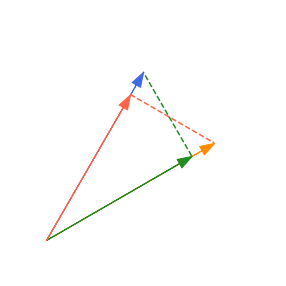

In [8]:
dt = u_direction.dot(v_direction)
u_proj_v = dt * v_direction
v_proj_u = dt * u_direction

fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.2,1.2])
ax.axis('off')
plot_vector_2d(u_direction, color='royalblue')
plot_vector_2d(v_direction, color='darkorange')

plot_vector_2d(u_proj_v, color = 'forestgreen')
plot_line(np.array([u_proj_v, u_direction]), linestyle = 'dashed', color='forestgreen')

plot_vector_2d(v_proj_u, color='tomato')
plot_line(np.array([v_proj_u, v_direction]), linestyle = 'dashed', color = 'tomato')
plt.show()

More generally, since the dot product is linear, if $\lVert\mathbf{u}\rVert$ is the norm of $\lVert\mathbf{u}$, $\lVert\mathbf{v}\rVert$ that of $\mathbf{v}$ and $\langle \mathbf{u}, \mathbf{v} \rangle$ the angle between the vectors, then 

$$ \mathbf{u}.\mathbf{v} = \lVert\mathbf{u}\rVert \lVert\mathbf{v}\rVert \cos{\langle \mathbf{u}, \mathbf{v} \rangle}$$

#### Same direction

In addition, another use for the dot product, is to test the alignment of two vectors : if the dot product is positive, the two vectors point in the same direction, and if it is negative, thei point in opposite directions. When it is zero the two vectors are orthogonal. 

In [9]:
u = np.array([1,1,1])

#collect vectors aligned with u, these will be blue
aligned = []

#collect vectors not aligned with u, these will be orange
disaligned = []

for _ in range(100):
    #create a normalized random direction
    v = np.random.normal(0,1,3)
    v /= np.linalg.norm(v)
    #test orientation
    orientation = u.dot(v)
    if orientation > 0:
        aligned.append(v)
    else:
        disaligned.append(v)
        
#draw
aligned = np.array(aligned)
disaligned = np.array(disaligned)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'3d'})
ax.set_box_aspect([1,1,1])
    
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.axis('off')

plot_vectors_3d(aligned, color='royalblue')
plot_vectors_3d(disaligned, color='darkorange')
plot_vector_3d(u, color = 'tomato', arrow_length_ratio = 0.05)

turntable(fig, 5)

This is classically used in image synthesis to test whether a polygon is facing the camera or not, using the direction from the camera to the polygon and the polygon normal as vectors.

### Cross product : getting orthogonal vectors,  normal, area

#### Definition

The cross product of two vectors is only defined in 3D. Its generalization in higher dimensions corresponds to a wedge product but this is another story. In terms of coordinates if is computed as

$$
\mathbf{u} \times \mathbf{v} = 
\begin{pmatrix}
u_1 v_2 - v_1 u_2 \\
u_2 v_0 - v_2 u_0 \\
u_0 v_1 - v_0 u_1
\end{pmatrix}
$$

it is natively defined in `numpy` using the `cross` operation.

In [10]:
u = np.array([1,2,3])
v = np.array([4,5,6])

np.cross(u,v)

array([-3,  6, -3])

The order of the parameters counts, inverting them yields the opposite result.

In [11]:
np.cross(v,u)

array([ 3, -6,  3])

It is also a linear operation on both of its parameters.

In [12]:
w = np.array([7,8,9])

print(np.cross(u, v+w))
print(np.cross(u,v) + np.cross(u,w))

[-9 18 -9]
[-9 18 -9]


#### Basic properties

A first property of the cross product is that it is orthogonal to both of the inputs.

In [13]:
print(u.dot(np.cross(u,v)))
print(v.dot(np.cross(u,v)))

0
0


In [14]:
#generate two radom unit vectors
u = np.random.normal(0,1,3)
u /= np.linalg.norm(u)
v = np.random.normal(0,1,3)
v /= np.linalg.norm(v)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'3d'})
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.axis('off')

plot_vector_3d(u, color='royalblue')
plot_vector_3d(v, color='darkorange')
plot_vector_3d(np.cross(u,v), color='tomato')

turntable(fig, 5)

The cros product is therefore used a lot to compute the normal vector of triangles in 3D : if $\mathbf{a}$, $\mathbf{b}$ and 

The cross product of two colinear vectors is a null vector.

In [15]:
np.cross(u, u)

array([0., 0., 0.])

The direction of the cross product of two vectors can be determined using the rule of the *right hand* : putting your right thumb on $\mathbf{u}$ and your right index on $\mathbf{v}$, the cross product $\mathbf{u} \times \mathbf{v}$ is in the direction of your right middle finger :

![right hand rule](right_hand.svg)

#### Sine, computing areas

The norm of the cross product of two vectors $\mathbf{u}$ and $\mathbf{v}$ yields the sine of the angle between the vectors in the plane they span :

$$
\lVert \mathbf{u} \times \mathbf{v} \rVert =
\lVert \mathbf{u} \rVert \lVert \mathbf{v} \rVert \lvert \sin{\langle \mathbf{u}, \mathbf{v} \rangle \rvert}
$$

This can be easily shown for specific vectors in the xy plane.

In [16]:
u_angle = random.uniform(0,2*math.pi)
u = np.array([math.cos(u_angle), math.sin(u_angle), 0])

v_angle = random.uniform(0, 2*math.pi)
v = np.array([math.cos(v_angle), math.sin(v_angle), 0])

With such vectors, the cross product becomes :

$$
\begin{pmatrix}
0 \\
0 \\
\cos{\theta_u}\sin{\theta_v} - \sin{\theta_u}\cos{\theta_v}
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
\sin{(\theta_v - \theta_u)}
\end{pmatrix}
$$

In [17]:
print(np.cross(u, v))
print(math.sin(v_angle - u_angle))

[ 0.         -0.         -0.96580005]
-0.9658000452105979


In [18]:
u = np.array([1,0,0])

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':'3d'})
plt.close()

def cross_norm_and_direction(i):
    ax.clear()
    ax.set_box_aspect([1,1,1])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

    v_angle = 2 * i * math.pi / 360
    v = np.array([math.cos(v_angle), math.sin(v_angle), 0])
    
    plot_vector_3d(u, ax = ax, color = 'royalblue')
    plot_vector_3d(v, ax = ax, color = 'darkorange')
    plot_vector_3d(np.cross(u,v), ax = ax, color = 'tomato')
    fig.canvas.draw_idle()
    
ani = matplotlib.animation.FuncAnimation(fig, cross_norm_and_direction, frames=range(0,360,5), interval = 100);
HTML(ani.to_html5_video())

This norm of the cross product corresponds to the area of the parallelogram spanned by $\mathbf{u}$ and $\mathbf{v}$.

![parallelogram area](parallelogram.svg)

This provides an easy way for computing the area of a triangle $(\mathbf{a}, \mathbf{b}, \mathbf{c})$ as 

$$
\mathrm{Area}(\mathbf{a}, \mathbf{b}, \mathbf{c}) =
\frac{\lVert (\mathbf{b} - \mathbf{a}) \times (\mathbf{c} - \mathbf{a}) \rVert}{2}
$$

### Determinant, signed area, volume, side

#### Determinant as a mixed cross and dot product

Given a matrix $M$ with columns (or lines) $\mathbf{u}$, $\mathbf{v}$ and $\mathbf{w}$ the determinant of $M$ is given by $(\mathbf{u} \times \mathbf{v}).\mathbf{w}$. This can be easily proved using the definition of both products, and noticing that it corresponds to computing the determinant using the cofactors of the $\mathbf{w}$ column.

In [19]:
u = np.random.random(3)
v = np.random.random(3)
w = np.random.random(3)

print(np.cross(u,v).dot(w))
print(np.linalg.det(np.stack([u,v,w])))

0.07966239005761024
0.07966239005761021


#### Signed area and volume of parallelepipeds, triangles, tetrahedrons

Using the geometric interpretation of the cross product and the dot product, determinants can actually be interpreted as volume computations. Ignoring its sign, the determinant of $M$ is the volume of the parallelepiped defined as

$$
\left\{
\mathbf{x} \in \mathbb{R}^3, 
\mathbf{x} = a.\mathbf{u} + b.\mathbf{v} + c.\mathbf{w},
(a,b,c) \in [0,1]^3
\right\}
$$

The cross product $\mathbf{u} \times \mathbf{v}$ yields a vector orthogonal to one face of the parallelepiped with its area as norm. The dot product between $\mathbf{w}$ and this vector actually projects $\mathbf{w}$ on $\mathbf{u} \times \mathbf{v}$ and provides the height of the parallelepiped.

![determinant as a volume](det_volume.svg)

The above assumes $\mathbf{u}$, $\mathbf{v}$ and $\mathbf{w}$ in that order define a *direct frame*, and therefore the dot product is positive. When the frame is not direct the dot product is negative, and yields the opposite of the volume of the parallelepiped. This is the *signed* volume of the parallelepiped, adding a notion of orientation between the vectors.

This also provides a way of computing the volume of triangles and tetrahedrons (and more generally simplices in any dimension). We already derived the area of a triangle using the norm of the cross product. In any dimension, the volume of a simplex is the volume of one of its faces, multiplied by the height of the simplex orthogonally to that face and divided by the dimension. For triangles, this is the length of one of its sides, multiplied by the associated height and divided by 2. In the above figure, we can see that the norm of $\mathbf{u} \times \mathbf{v}$ is twice the area of the triangle

$$
\left\{
\mathbf{x} \in \mathbb{R}^3, 
\mathbf{x} = a.\mathbf{u} + b.\mathbf{v},
(a,b) \in [0,1]^3,
a + b = 1
\right\}
$$

and the full determinant, ignoring the sign, multiplies this area by the length of the height associated with this face. We therefore have 

$$
\mathrm{Volume}\left(
    \left\{
        \mathbf{x} \in \mathbb{R}^3, 
        \mathbf{x} = a.\mathbf{u} + b.\mathbf{v} + c.\mathbf{w},
        (a,b,c) \in [0,1]^3,
        a + b + c= 1
    \right\}
\right)
=
\frac{
    \lvert
        \det{\begin{pmatrix}\mathbf{u} & \mathbf{v} & \mathbf{w}\end{pmatrix}}
    \rvert
}{
6
}
$$

Using this tool, it is actually possible to compute the area of any polygon, and the volume of any polyhedron as the sum of determinants. In 2D, the signed area of a triangle given by the determinant will be positive is the vertices are provided in positive order (anti clockwise), negative otherwise. Therefore given the vertices of the polygon in positive order, using any point in space, the area of the polygon can be obtained as the sum of the oriented areas of the triangles formed with the point and two consecutive points around the polygon in that order.

![polygon area as a sum of oriented triangle areas](polygon_area.svg)

##### Exercise : polygon area

Write a function for the computation of the area of an arbitrary 2D polygon. You can test your function on the following polygon.

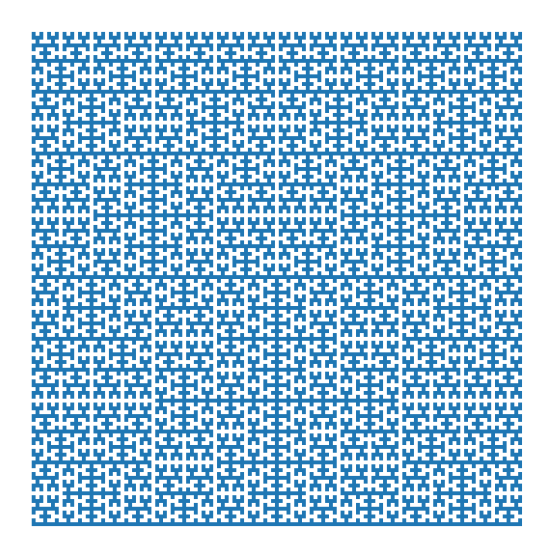

The area of this polygon is 8255, to be compared with your result.


In [20]:
hilbert_scale = 7

def hilbert(source, direction, scale, orientation = True):
    if scale == 0:
        yield source
    else:
        length = 2**(scale-1)
        rot = np.array([-direction[1],direction[0]])
        if not orientation :
            rot = -rot
        yield from hilbert(source, rot, scale-1, not orientation)
        yield from hilbert(source + length * rot, direction, scale-1, orientation)
        yield from hilbert(source + length * (rot + direction), direction, scale-1, orientation)
        yield from hilbert(source + length * (rot + 2*direction) - rot - direction, -rot, scale-1, not orientation)

polygon = list(hilbert(np.array([0,0]), np.array([1,0]), hilbert_scale))
polygon = np.flip(np.array([[0,-1],*polygon, polygon[-1] + np.array([0,-1])]), axis = 0)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.axis('off')
plt.fill(polygon[:,0], polygon[:,1])
plt.show()

target_area = 2**(2*hilbert_scale - 1) + 2**(hilbert_scale - 1) - 1
print(f"The area of this polygon is {target_area}, to be compared with your result.")

##### Solution

Using the origin as the source point for the triangles, the computations are simpler. It just corresponds to a loop over the edges of the polygon. Note that our computations use floating point arithmetics, and therefore each triangle area computed via a determinant is rounded and introduces a small error. These errors accumulate and may cause differences between the reference and the computed value.

In [21]:
def area(poly):
    size = len(poly)
    area = 0
    for i in range(size):
        mat = np.stack([poly[i], poly[(i+1)%size]])
        area += 0.5*np.linalg.det(mat)
    return area

In [22]:
area(polygon)

8255.0000000001

#### Side

The determinant is also classically used for the **side** predicate : given a line in 2D, plane in 3D of more generally a hyperplane in dimension $d$, and a vector, determine on which side of the hyperplane the vector lies. This is done by taking $d-1$ vectors spanning the hyperplane, and building a $d \times d$ matrix using these vectors as the $d-1$ first columns, and the query vector as the last column. As mentionned before, the sign of this determinant will determine whether these vectors form a direct frame or not. The fact that the frame is direct or not depends on the side of the query wrt. the hyperplane.

In 2D this visually tests whether a vector $\mathbf{v}$ is on the left or right of a vector $\mathbf{u}$. In this case the value of the determinant is $\lVert \mathbf{u} \rVert \lVert \mathbf{v} \rVert \sin{\langle \mathbf{u}, \mathbf{v} \rangle}$, and the sign of the sine changes with that of $\langle \mathbf{u}, \mathbf{v} \rangle$.

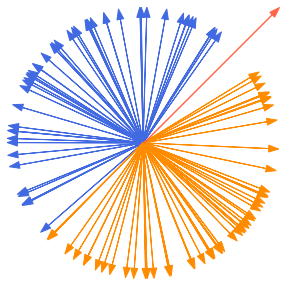

In [23]:
u = np.array([1,1])

#collect vectors on the left of u, these will be blue
left = []

#collect vectors on the right u, these will be orange
right = []

for _ in range(100):
    #create a normalized random direction
    v = np.random.normal(0,1,2)
    v /= np.linalg.norm(v)
    #test side
    side = np.linalg.det(np.stack([u, v]))
    if side > 0:
        left.append(v)
    else:
        right.append(v)
        
#draw
left = np.array(left)
right = np.array(right)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

plot_vectors_2d(left, color='royalblue')
plot_vectors_2d(right, color='darkorange')
plot_vector_2d(u, color = 'tomato')

plt.show()

##### Exercise : segment intersection

In 2D, two segments $[\mathbf{p_0},\mathbf{p_1}]$ and $[\mathbf{q_0},\mathbf{q_1}]$ intersect if and only if $\mathbf{p_0}$ and $\mathbf{p_1}$ are on different sides of $[\mathbf{q_0},\mathbf{q_1}]$ and $\mathbf{q_0}$ and $\mathbf{q_1}$ are on different sides of $[\mathbf{p_0},\mathbf{p_1}]$. Write a function to check that.

##### Solution : segment intersection

The side of $\mathbf{p_0}$ with respect to $[\mathbf{q_0},\mathbf{q_1}]$ can be checked by using the side predicate with vectors $\mathbf{p_0} - \mathbf{q_0}$ and $\mathbf{q_1} - \mathbf{q_0}$. Determining if two quantities have different signs can be done by checking whether their product is negative.

In [24]:
def segment_intersect(p0,p1,q0,q1):
    s0 = p1 - p0
    s1 = q1 - q0
    sidep0 = np.linalg.det(np.stack([p0 - q0, s1]))
    sidep1 = np.linalg.det(np.stack([p1 - q0, s1]))
    sideq0 = np.linalg.det(np.stack([q0 - p0, s0]))
    sideq1 = np.linalg.det(np.stack([q1 - p0, s0]))
    return sidep0*sidep1 < 0 and sideq0*sideq1 < 0

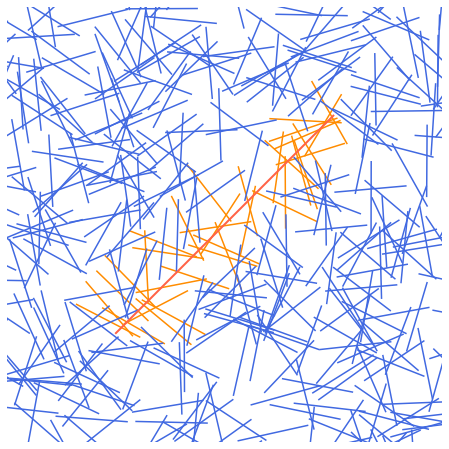

In [25]:
p0 = np.array([-0.5,-0.5])
p1 = np.array([0.5,0.5])

#collect segments intersecting [p0,p1], these will be orange
intersect = []

#collect segments not intersecting [p0,p1], these will be blue
dontintersect = []

for _ in range(400):
    #create a small random segment
    q0 = np.random.random(2) * 2 - 1
    q1 = np.random.normal(0,1,2)
    q1 /= 3*np.linalg.norm(q1)
    q1 += q0
    #test intersection
    if segment_intersect(p0,p1,q0,q1):
        intersect.append([q0,q1])
    else:
        dontintersect.append([q0,q1])
        
#draw
intersect_lines = matplotlib.collections.LineCollection(intersect, color='darkorange')
dontintersect_lines = matplotlib.collections.LineCollection(dontintersect, color='royalblue')


fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

ax.add_collection(intersect_lines)
ax.add_collection(dontintersect_lines)
plt.plot([p0[0],p1[0]],[p0[1],p1[1]], linewidth=2, color = 'tomato', zorder=2)

plt.show()

## Transformation matrices

As you probably know, linear transformations in vector spaces can be described in terms of matrices and applied and composed products. We will focus now on how to descibe the matrix corresponding to the transformation you want. To do so we will examine the very definition of the matrix product.

### Building a transformation matrix

We using coordinates, every things depends on a basis. In 3D, the classical frame uses three axis, namely $\mathbf{x}$, $\mathbf{y}$ and $\mathbf{z}$. In terms of coordinates, the basis vectors are classically written as the three vectors $\mathbf{e_0} = \begin{pmatrix}1 \\ 0 \\ 0\end{pmatrix}$, $\mathbf{e_1} = \begin{pmatrix}0 \\ 1 \\ 0\end{pmatrix}$, $\mathbf{e_2} = \begin{pmatrix}0 \\ 0 \\ 1\end{pmatrix}$. Every vector can then be described as a sum of these three basis vectors :

$$
  \mathbf{u} = \begin{pmatrix} u_0 \\ u_1 \\ u_2 \end{pmatrix}
  = u_0 \mathbf{e_0} + u_1 \mathbf{e_1} +u_2 \mathbf{e_2}
$$

Given any $3 \times 3$ matrix $M$ corresponding to a linear transformation, applying this transformation to $\mathbf{u}$ is done through a matrix vector product. And since the transformation is linear, this product can be developped on the basis vectors :

$$
  M\mathbf{u}
  = u_0 M\mathbf{e_0} + u_1 M\mathbf{e_1} +u_2 M\mathbf{e_2}
$$

This shows that if you can express the image of the basis vectors through the transformation you want, you can express the transformation on any vector. If M is described as

$$
    M = \begin{pmatrix}
        a_{0,0} & a_{0,1} & a_{0,2} \\
        a_{1,0} & a_{1,1} & a_{1,2} \\
        a_{2,0} & a_{2,1} & a_{2,2} \\
    \end{pmatrix}
$$

using the matrix vector product, we can show that the images of those basis vectors are actually the columns of this matrix :

$$
    M\mathbf{e_0} = \begin{pmatrix} a_{0,0} \\ a_{1,0} \\ a_{2,0} \end{pmatrix}, \quad
    M\mathbf{e_1} = \begin{pmatrix} a_{0,1} \\ a_{1,1} \\ a_{2,1} \end{pmatrix}, \quad
    M\mathbf{e_2} = \begin{pmatrix} a_{0,2} \\ a_{1,2} \\ a_{2,2} \end{pmatrix}
$$

This leads to a method to be able to find how to fill a matrix depending on the desired transformation : simply express the image of the basis vectors depending on the desired transformation, and fill the columns of the matrix.

#### Application, rotation matrix around on of the basis vectors

We will illustrate the previous method for a simple matrix : the rotation around the $\mathbf{z}$ axis, of an angle $\theta$. Let us call $T$ this transformation.

![rotation around axis z](rotation_z.svg)

We can therefore express the coordinates of the transformed vectors :

$$
T\mathbf{e_0} = \begin{pmatrix} \cos{\theta} \\ \sin{\theta} \\ 0 \end{pmatrix}, \quad
T\mathbf{e_1} = \begin{pmatrix} \sin{\theta} \\ -\cos{\theta} \\ 0 \end{pmatrix}, \quad
T\mathbf{e_2} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
$$

which yields the matrix

$$
\begin{pmatrix} 
\cos{\theta} & \sin{\theta} & 0 \\
\sin{\theta} & -\cos{\theta} & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

#### Exercise : simple transformation matrices

Write the transformation matrices which when multiplied with a vector yield

* its projection on a line given by a normalized vector $\mathbf{u}$
* its projection on a plane given by a normalized normal vector $\mathbf{u}$
* its symmetry with respect to a line given by a normalized vector $\mathbf{u}$
* its symmetry with respect to a plane given by a normalized vector $\mathbf{u}$
* its rotation of an angle $\theta$ given by a normalized vector $\mathbf{u}$

#### Solution : simple transformation matrices

##### Projection on a line

The projection of a vector $\mathbf{v}$ on a line, as descibed in the dot product section, is given by $(\mathbf{v}.\mathbf{u})\mathbf{u}$. The simplest way to get the matrix is notice that the dot product can be expressed as a vector vector product using the transpose : $\mathbf{v}.\mathbf{u} = \mathbf{v}^T\mathbf{u} = \mathbf{u}^T \mathbf{v}$. We can now rewrite the projection as $\mathbf{u}\mathbf{u}^T\mathbf{v}$, and get the matrix by isolating the multiplier of $\mathbf{v}$ : $\mathbf{u}\mathbf{u}^T$.

Using the method of the image of the basis vectors yields $u_0\mathbf{u}$ as a first column, $u_1\mathbf{u}$ as the second and $u_2\mathbf{u}$ as the third. We therefore get the matrix :

$$
\begin{pmatrix}
u_0u_0 & u_1u_0 & u_2u_0 \\
u_0u_1 & u_1u_1 & u_2u_1 \\
u_0u_2 & u_1u_2 & u_2u_2 \\
\end{pmatrix}
$$

##### Projection on a plane

The projection on a plane can be done by subtracting the part of the vector that is orthogonal to the plane. A vector $\mathbf{v}$ thus becomes $\mathbf{v} - (\mathbf{v}.\mathbf{u})\mathbf{u}$. Factorizing $\mathbf{v}$ the matrix can be expressed as $\mathrm{Id} - \mathbf{u}\mathbf{u}^T$.

Using the method of the image of the basis vectors, we get $\mathbf{e_0} - u_0\mathbf{u}$ as the first column, and so on, and finally the matrix

$$
\begin{pmatrix}
1 - u_0u_0 & -u_1u_0 & -u_2u_0 \\
-u_0u_1 & 1 - u_1u_1 & -u_2u_1 \\
-u_0u_2 & -u_1u_2 & 1 - u_2u_2 \\
\end{pmatrix}
$$

##### Symmetry with respect to a line

The symmetry can be done by decomposing the vector $\mathbf{v}$ in two parts : the part colinear with $\mathbf{u}$ and the part that is orthogonal to $\mathbf{u}$ . Now the symmetric vector is composed as the sum of the colinear part, and the opposite of the orthogonal part. The colinear part is $(\mathbf{v}.\mathbf{u})\mathbf{u}$ and the orthogonal part is $\mathbf{v} - (\mathbf{v}.\mathbf{u})\mathbf{u}$. We therefore get the symetry as $2(\mathbf{v}.\mathbf{u})\mathbf{u} - \mathbf{v}$. The matrix can therefore be expressed as $2\mathbf{u}\mathbf{u}^T - \mathrm{Id}$ :

$$
\begin{pmatrix}
2u_0u_0 - 1 & 2u_1u_0 & 2u_2u_0 \\
2u_0u_1 & 2u_1u_1 - 1 & 2u_2u_1 \\
2u_0u_2 & 2u_1u_2 & 2u_2u_2 - 1 \\
\end{pmatrix}
$$

##### Symmetry with respect to a plane

Using a similar process as for the line symmetry, we get the orthogonal part as $(\mathbf{v}.\mathbf{u})\mathbf{u}$ and the colinear part as $\mathbf{v} - (\mathbf{v}.\mathbf{u})\mathbf{u}$. The symmetry is therefore $\mathbf{v} - 2(\mathbf{u}.\mathbf{v})\mathbf{u}$, and is the opposite of the line projection :

$$
\begin{pmatrix}
1 - 2u_0u_0 & -2u_1u_0 & -2u_2u_0 \\
-2u_0u_1 & 1 - 2u_1u_1 & -2u_2u_1 \\
-2u_0u_2 & -2u_1u_2 & 1 - 2u_2u_2 \\
\end{pmatrix}
$$

##### Rotation around an axis

Given the normalized axis $\mathbf{u}$, any vector $\mathbf{v}$ can be decomposed in a part colinear with $\mathbf{u}$ and a part orthogonal to $\mathbf{u}$ using the projections.

$$
\begin{aligned}
    \mathbf{v} &= \mathbf{v}_{\parallel} + \mathbf{v}_{\perp} ;\\
    \mathbf{v}_{\parallel} &= \mathbf{u}\mathbf{u}^t\mathbf{v} ;\\
    \mathbf{v}_{\perp} &= (\mathrm{Id} - \mathbf{u}\mathbf{u}^t)\mathbf{v}.
\end{aligned}
$$

The rotation leaves the colinear intact. To express the rotation on the orthogonal part, we need to add another vector to finalize a basis, which is a vector $\mathbf{v}_{\dashv}$ orthogonal to both $\mathbf{v}$ and $\mathbf{u}$ and which has the same norm as $\mathbf{v}_{\perp}$. Using that $\lVert \mathbf{v}_{\parallel} \rVert = \lvert \cos{\langle \mathbf{u}, \mathbf{v} \rangle} \rvert \lVert \mathbf{v} \rVert$ we can derive that $\lVert \mathbf{u}_{\perp} \rVert = \lvert \sin{\langle \mathbf{u}, \mathbf{v} \rangle} \rvert \lVert \mathbf{v} \rVert$. We also need the frame $(\mathbf{v}_{\perp}, \mathbf{v}_{\dashv}, \mathbf{u})$ to be direct for the rotation to be in the correct direction.  We can therefore use

$$
\mathbf{v}_{\dashv} = \mathbf{u} \times \mathbf{v}.
$$

We can finally express the rotated vector as 

$$
\begin{aligned}
    \mathbf{v}_{\parallel} + \cos{\theta} \mathbf{v}_{\perp} + \sin{\theta} \mathbf{v}_{\dashv}
    &= (\mathbf{u}\mathbf{u}^t + \cos{\theta}(\mathrm{Id} - \mathbf{u}\mathbf{u}^t) + \sin{\theta}C_{\mathbf{u}})\mathbf{v}
\end{aligned}
$$

with $C_{\mathbf{u}}$ being the skew-symmetric matrix corresponding to the cross product with $\mathbf{u}$, sometimes also written $[\mathbf{u}]_{\times}$ :

$$
\begin{pmatrix}
     0   & -u_z &  u_y \\
     u_z &  0   & -u_x \\
    -u_y &  u_x &  0   
\end{pmatrix}
$$

### Homogeneous coordinates : What about points and translations ?

We've only dealt with vectors so far. Translations have no effect on vectors. They affect **points**. And using 3D vectors as points to apply a translation by adding vectors is not a solution, since a translation is not a linear transformation, and therefore cannot be expressed with a $3 \times 3$ matrix : given points $\mathbf{p}$ and $\mathbf{q}$, applying a translation with vector $\mathbf{t}$ yields $\mathbf{p} + \mathbf{t}$ and $\mathbf{q} +\mathbf{t}$. Now define a point with coordinates $\mathbf{p} + \mathbf{q}$, its translate is given by $\mathbf{p} +\mathbf{q} +\mathbf{t}$, and not the sum of the translates of $\mathbf{p}$ and $\mathbf{q}$. I took precautions writing “define a point with coordinates $\mathbf{p} +\mathbf{q}$” because geometrically, summing points has no meaning (except maybe when defining barycenters).


#### Construction

A solution however exists by lifting everything with an additional dimension, and therefore using **homogeneous coordinates**. Such coordinates were defined for projective geometry, and prove very usefull in graphics to unify points, vectors and a wider class of transformations, including translations. Basically homogeneous coordinates were designed to describe a *projective* space. A projective space can be viewed as the regular euclidean space, augmented with *points at infinity*. In such a space, any two lines intersect at a unique point. For each family of lines that would have been parallel in euclidean space, a point at infinity is added corresponding to their intersection. An additional line is also added, passing through all the points at infinity. Homogenous coordinates map each point of the $d$ dimensional projective space to a line in the $d+1$ dimensional euclidean space passing through the origin. For the three dimnensional projective space, the regular point with coordinates $(x, y, z)^t$, is mapped to the line $\left \{ \alpha (x, y, z, 1)^t, \alpha \in \mathbb{R} \right \}$. The only lines passing through the origin in $\mathbb{R}^4$ still not mapped to a point are those defined as $\left \{ \alpha (x, y, z, 0)^t, \alpha \in \mathbb{R} \right \}$. These lines are mapped to the points at infinity : the point at infinity corresponding to the intersection of the family of parallel lines colinear with the vector with coordinates $(x, y, z)^t$.

#### Translations

A translation of a vector $\mathbf{t} = (t_0, t_1, t_2)^t$ can be expressed in homogeneous coordinates with the following matrix :

$$
\begin{pmatrix}
1 & 0 & 0 & t_0 \\
0 & 1 & 0 & t_1 \\
0 & 0 & 1 & t_2 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

This matrix, when multiplied by a homogeneous vector $(p_0, p_1, p_2, 1)^t$ corresponding to a point yields the translated point $(p_0 + t_0, p_1 + t_1, p_2 + t_2, 1)$. Note also that translating a point at infinity $(p_0, p_1, p_2, 0)^t$ has no effect since translating paralell lines has no effect on their direction, and therefore there intersection point remains the same point at infinity.

#### Classical transformations

Classical 3D linear transformations can also be expressed in homogeneous coordinates. If $M$ is the 3 by 3 matrix corresponding to the transformation, then the following homogeneous matrix performs that transformation on homogeneous point :

$$
\begin{pmatrix}
  &   &   & 0 \\
  & M &   & 0 \\
  &   &   & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

#### Changing frame

Since translations are now available, we can express the matrix of a change of frame. Let $\mathbf{c}$ be the origin of a frame, and $\mathbf{v_0}$, $\mathbf{v_1}$, $\mathbf{v_2}$ its basis vectors, all expressed in the usual frame centered at $(0,0,0)^t$ with basis $(1,0,0)^t$, $(0,1,0)^t$ and $(0,0,1)^t$. A point $\mathbf{p} = (p_0, p_1, p_2)^t$ with coordinates in the new frame can be expressed in the usual frame simply as $\mathbf{c} + p_0\mathbf{v_0} + p_1\mathbf{v_1} + p_2\mathbf{v_2}$. The matrix expressing this change of variables is therefore

$$
\begin{pmatrix}
  &   &   &  \\
\mathbf{v_0} & \mathbf{v_1} & \mathbf{v_2} & \mathbf{c} \\
  &   &   &  \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

The matrix to go from the usual frame to the new one is just its inverse.

### Composition

Composing multiple transformations consists in applying them one afer the other. In terms of matrices and multiplication, if $T_1$ is the matrix of the first transformation to apply and $T_2$ is that of the second, an input vector $\mathbf{v}$ will therefore be first multiplied by $T_1$ and then by $T_2$. The resulting vector is thus expressed as $T_2T_1\mathbf{v}$. The resulting transformation matrix is therefore given by $T_2T_1$.